## Audio Fingerprinting & Similarité Vectoriell
---
# 🎼🎼🎼🎼🎼🎼🎼🎼🎼🎼🎼🎼 
### Introduction et Concept

Lundi, vous avez découvert que les mots pouvaient être projetés dans un espace vectoriel (Word2Vec) où la distance entre deux points représente leur proximité sémantique. Ce matin, nous appliquons ce concept au signal sonore. L'idée est de démontrer qu'un son n'est pas qu'une onde temporelle, mais peut être résumé par une "empreinte numérique" (un **embedding**) permettant de mesurer mathématiquement la ressemblance entre deux bruits sans même utiliser d'IA complexe.

[Documentation-Librosa](https://librosa.org/doc/main/index.html)

### 0. Lexique 
---
Découvrez la signification des termes suivants: 

>**Les fondamentaux**
* **SR / fs (Sampling Rate / Sampling Frequency)**

FR : Nombre d’échantillons du signal audio mesurés par seconde (ex. 44 100 Hz).

RU : Частота дискретизации — количество отсчётов сигнала в секунду (например, 44 100 Гц).

* **Théorème de Nyquist-Shannon**

FR : Pour reconstruire un signal sans perte, la fréquence d’échantillonnage doit être au moins deux fois la fréquence maximale du signal.

RU : Теорема Найквиста–Шеннона: для корректного восстановления сигнала частота дискретизации должна быть минимум в 2 раза выше максимальной частоты сигнала.

* **Aliasing**

FR : Distorsion causée par un échantillonnage insuffisant, où les hautes fréquences apparaissent comme des basses fréquences.

RU : Алиасинг — искажение при недостаточной частоте дискретизации, когда высокие частоты «маскируются» под низкие.

* **Pitch**

FR : Hauteur perçue d’un son, liée à sa fréquence fondamentale.

RU : Высота звука, связанная с его основной (фундаментальной) частотой.

* **RMS (Root Mean Square)**

FR : Mesure de l’énergie moyenne d’un signal audio.

RU : Среднеквадратичное значение сигнала, характеризующее его среднюю энергию/громкость.

* **ZCR (Zero Crossing Rate)**

FR : Nombre de fois où le signal traverse zéro par unité de temps.

RU : Частота пересечения нуля — сколько раз сигнал меняет знак за определённый интервал.

>**L'espace fréquentiel (Transformations)**

* **STFT (Short-Time Fourier Transform)**

FR : Transformation de Fourier appliquée sur de courtes fenêtres successives pour analyser l’évolution fréquentielle dans le temps.

RU : Кратковременное преобразование Фурье — анализ частотного состава сигнала по коротким временным окнам.

* **Échelle de Mel**

FR : Échelle perceptuelle des fréquences basée sur la perception humaine du son.

RU : Мел-шкала — частотная шкала, соответствующая человеческому восприятию высоты звука.

* **Spectrogramme de puissance (Power Spectrogram)**

FR : Représentation temps-fréquence montrant la puissance (énergie) des composantes fréquentielles.

RU : Спектрограмма мощности — временно-частотное представление энергии частотных компонентов.

* **DB Scale (Amplitude vs Power to dB)**

FR : Conversion logarithmique de l’amplitude ou de la puissance en décibels pour mieux représenter la dynamique du son.

RU : Логарифмическое преобразование амплитуды или мощности в децибелы для удобного отображения динамического диапазона.

>**L'univers du Cepstre**

* **MFCC (Mel-Frequency Cepstral Coefficients)**

FR : Coefficients cepstraux calculés sur l’échelle de Mel, utilisés comme caractéristiques audio pour la reconnaissance vocale.

RU : Мел-кепстральные коэффициенты — признаки, полученные из мел-спектра, широко применяются в распознавании речи.

* **Quefrence**

FR : Axe du cepstre correspondant au « temps » après transformation logarithmique et inverse de Fourier.

RU : Квефренция — «временная» ось в кепстральной области после логарифмирования спектра и обратного преобразования Фурье.

* **Saphe**

FR : Partie basse du cepstre associée à l’enveloppe spectrale (structure globale du signal).

RU : Сафе — низкочастотная часть кепстра, связанная со спектральной огибающей.

* **Liftrage**

FR : Filtrage dans le domaine cepstral pour sélectionner certaines composantes (ex. supprimer la structure fine).

RU : Лифтринг — фильтрация в кепстральной области для выделения или подавления определённых компонентов.

>**Analyse de contenu et temporelle**

* **Chroma (Chromagramme)**

FR : Représentation des 12 classes de hauteurs (notes) indépendamment de l’octave.

RU : Хромаграмма — представление 12 классов нот без учёта октавы.

* **Onset Detection**

FR : Détection automatique des débuts d’événements sonores (attaques).

RU : Детекция onset — определение моментов начала звуковых событий.

* **Spectral Centroid**

FR : Fréquence moyenne pondérée du spectre, perçue comme la « brillance » du son.

RU : Спектральный центроид — средневзвешенная частота спектра, отражает «яркость» звука.

* **Spectral Roll-off**

FR : Fréquence sous laquelle un certain pourcentage (ex. 85 %) de l’énergie spectrale est concentré.

RU : Spectral roll-off — частота, ниже которой сосредоточен заданный процент (например, 85 %) энергии спектра.

>**Préparation pour l'IA (Shape)**

* **Padding**

FR : Ajout de zéros pour uniformiser la longueur des séquences audio.

RU : Дополнение нулями для выравнивания длины аудиосигналов.

* **Truncate**

FR : Coupe d’un signal pour réduire sa longueur à une taille fixe.

RU : Обрезка сигнала до фиксированной длины.

* **Overlap (Hop Length)**

FR : Chevauchement entre deux fenêtres successives lors de l’analyse (la hop length est le pas entre fenêtres).

RU : Перекрытие окон при анализе; hop length — шаг между соседними окнами.


### 1. Acquisition et Décomposition du Signal

La première étape consiste à charger et décomposer la structure du son. À l'aide de `librosa`, vous chargerez deux fichiers audio de natures différentes (vous avez une liste en dessous pour les sons). Vous devrez d'abord visualiser l'onde temporelle (**Waveform**) pour constater les limites de l'analyse temporelle brute. Ensuite, vous passerez à l'analyse fréquentielle en calculant la **STFT** (Short-Time Fourier Transform) pour afficher un spectrogramme linéaire. Enfin, vous explorerez l'échelle de **Mel** pour comprendre comment cette transformation logarithmique permet de coller à la perception humaine en accentuant les détails dans les basses fréquences.

- `librosa.display.waveshow()`
- `librosa.amplitude_to_db(librosa.stft())` 
- `librosa.feature.melspectrogram()`

Fichiers audio
- [x] [Kaggle-UrbanSound8K](https://www.kaggle.com/datasets/chrisfilo/urbansound8k) 
- [ ] [Librosa-ex-files](https://librosa.org/doc/main/recordings.html)
- [ ] [Bibliothèque-sample](https://lasonotheque.org/)

In [17]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from numpy.fft import fft, fftshift  

import librosa 
import librosa.display 
from IPython.display import Audio

In [28]:

df = pd.read_csv(r"C:\Users\Utilisateur\Simplon\Audio_dataset\archive (9)\UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
# chargerez deux fichiers audio de natures différentes 

N_ex = 5



def sampling(N_ex):
    samples = []
    for i in range(N_ex):
        idx = np.random.randint(len(df))
        
        fold = df.loc[idx, 'fold']
        file_name = df.loc[idx, 'slice_file_name']
        
        path_ex = os.path.join(
            r"C:\Users\Utilisateur\Simplon\Audio_dataset\archive (9)",
            f"fold{fold}",
            file_name
        )

        y_i, fs_i = librosa.load(path_ex, sr=None)
        
        samples.append({
            "signal": y_i,
            "sr": fs_i,
            "class": df.loc[idx, 'class']
        })
    return samples

samples = sampling(N_ex)

Audio(data=samples[1]["signal"], rate=samples[1]["sr"])

In [44]:

def show_waveform(samples, N_ex):
    fig, axes = plt.subplots(1, N_ex, figsize=(15, 5))

    for i in range(N_ex):
        librosa.display.waveshow(y=samples[i]["signal"], sr=samples[i]["sr"], ax=axes[i])
        axes[i].set_title(f'Waveform {i}: {samples[i]["class"]}')

    plt.tight_layout()
    plt.show()



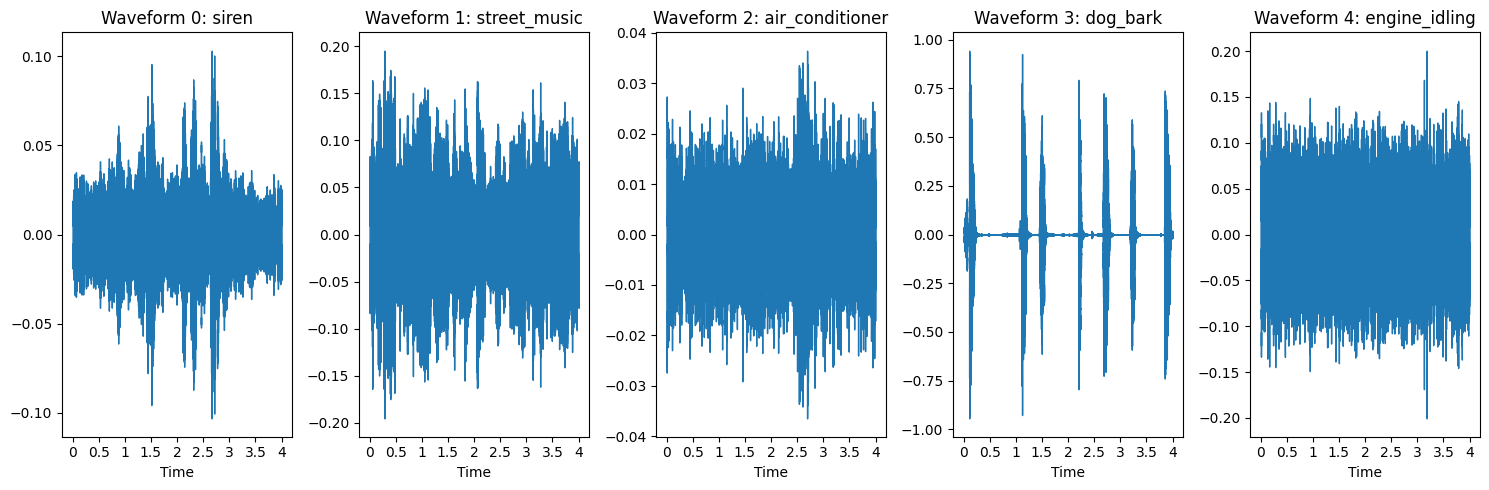

In [45]:
show_waveform(samples, N_ex)

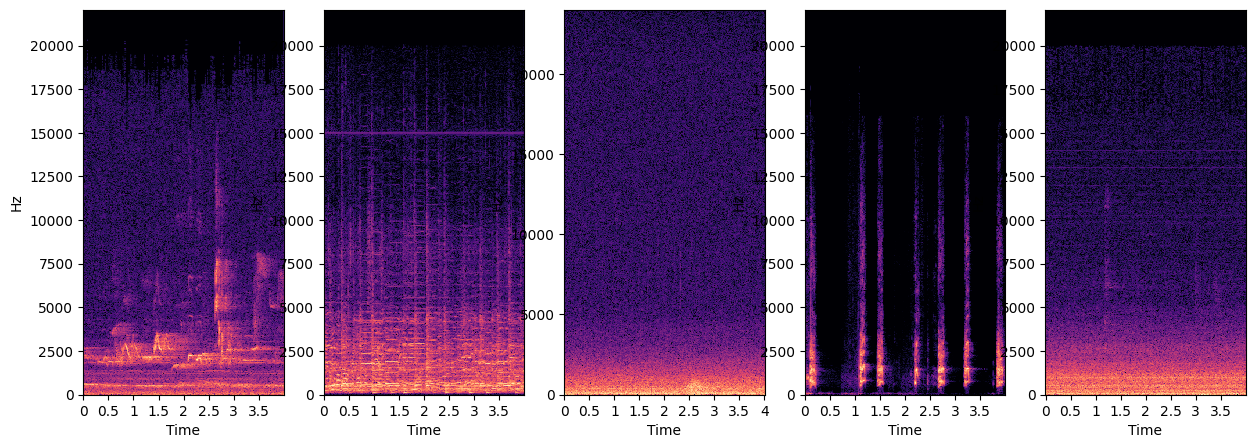

In [ ]:
#  analyse fréquentielle en calculant la **STFT** (Short-Time Fourier Transform) pour afficher un spectrogramme linéaire
def show_spectrogramme_linaire(samples, N_ex):
    n_fft=2048
    hop_length=512

    fig, axes = plt.subplots(1, N_ex, figsize=(15, 5))


    for  i in range(N_ex):
        # 1. STFT (module)
        y = samples[i]["signal"]
        sr = samples[i]["sr"]


        D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
        S = np.abs(D)

        # 2. Conversion en dB (échelle logarithmique)
        S_db = librosa.amplitude_to_db(S, ref=np.max)

        # visualisation
        librosa.display.specshow(
            S_db,
            sr=sr,
            hop_length=hop_length,
            x_axis='time',
            y_axis='linear',
            ax=axes[i]   # échelle fréquentielle linéaire
        )

show_spectrogramme_linaire(samples, N_ex)


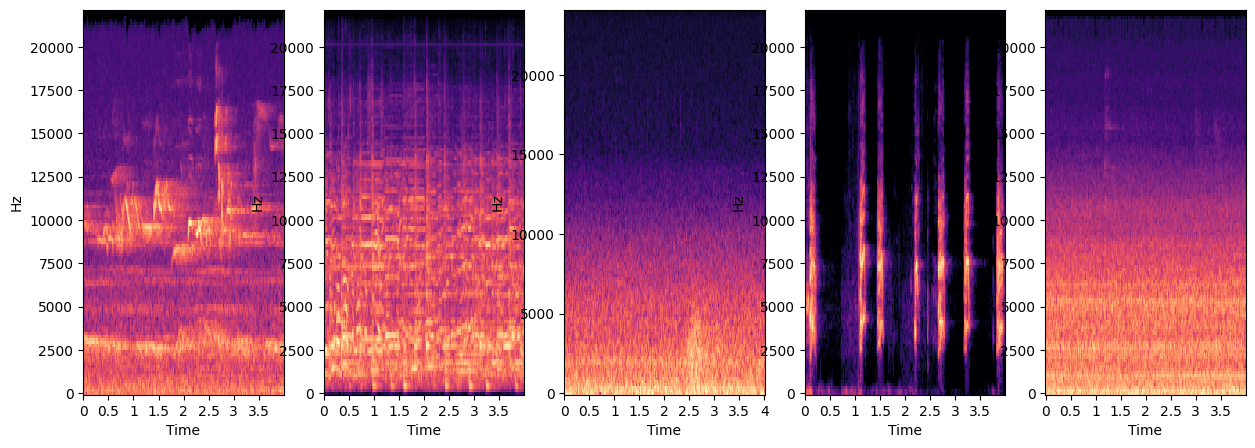

In [ ]:
# explorerer l'échelle de Mel 

def show_spectrogramme_mel(samples, N_ex):

    n_fft=2048
    hop_length=512
    n_mels=128

    fig, axes = plt.subplots(1, N_ex, figsize=(15, 5))

    for i in range(N_ex):
        y = samples[i]["signal"]
        sr = samples[i]["sr"]

        # Spectrogramme de puissance
        S = librosa.feature.melspectrogram(
            y=y,
            sr=sr,
            n_fft=n_fft,
            hop_length=hop_length,
            n_mels=n_mels,
            power=2.0   # spectrogramme de puissance
        )
        # 2. Conversion en dB
        S_db = librosa.power_to_db(S, ref=np.max)

        # visualisation
        librosa.display.specshow(
            S_db,
            sr=sr,
            hop_length=hop_length,
            x_axis='time',
            y_axis='linear',
            ax=axes[i]   # échelle fréquentielle linéaire
        )
       

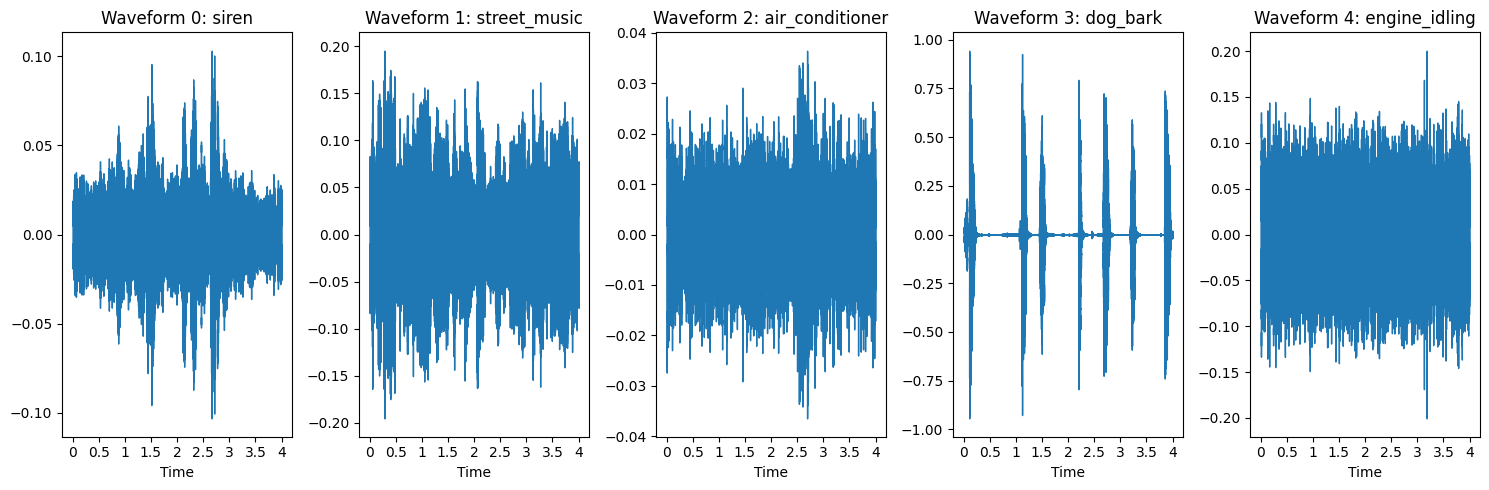

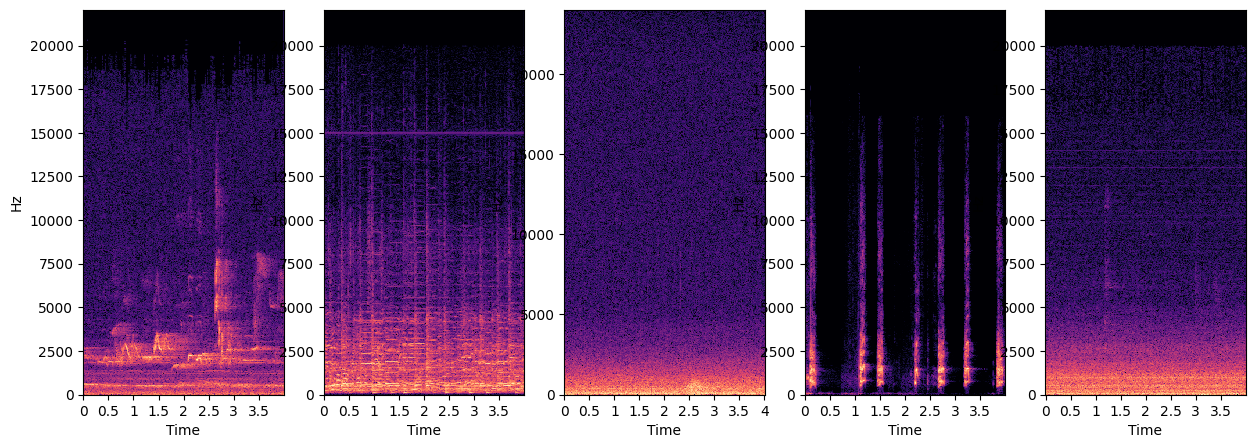

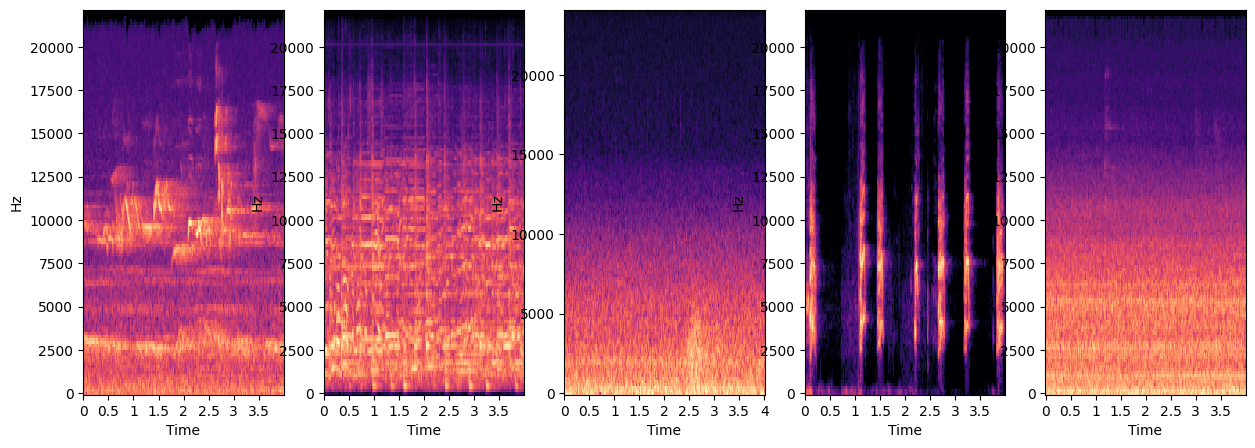

In [50]:
show_waveform(samples, N_ex)
show_spectrogramme_linaire(samples, N_ex)
show_spectrogramme_mel(samples, N_ex)

### 2. Extraction des "Audio Embeddings" via MFCC

type 1 : trumpet par exemple
type 2 : drum par exemple

Pour transformer ces images fréquentielles en vecteurs manipulables, nous allons extraire les **MFCC** (Mel-Frequency Cepstral Coefficients). Plutôt que de garder toute la séquence temporelle, vous calculerez la **moyenne temporelle** de chaque coefficient pour chaque fichier. Pour un set de 10 fichiers (5 de type 1 et 5 de type 2), vous obtiendrez ainsi 10 vecteurs compacts (généralement de taille 20). Je vous conseil de limiter la taille des sons à 1 seconde (fs ou sr). Ces vecteurs constituent vos "Audio Embeddings". Une visualisation sous forme de **Heatmap** de ces vecteurs moyens vous permettra de vérifier visuellement si les signatures du type 1 se ressemblent entre elles et se distinguent de celles du type 2.

In [ ]:
### 3. Mesure de Proximité par Similarité Cosinus

C'est ici que nous faisons le pont avec les outils du NLP. En utilisant la **similarité cosinus**, vous allez mesurer l'angle entre ces empreintes sonores dans l'espace vectoriel. Vous devrez construire une **matrice de similarité** complète (10x10) comparant chaque son avec tous les autres du dataset.

Pour réaliser ce calcul, vous utiliserez la fonction suivante :

```python
from sklearn.metrics.pairwise import cosine_similarity

def compute_audio_similarity(vec1, vec2):
    # Reshape car la fonction attend un tableau 2D
    v1 = vec1.reshape(1, -1)
    v2 = vec2.reshape(1, -1)
    return cosine_similarity(v1, v2)[0][0]

```

L'objectif est d'afficher cette matrice via `seaborn.heatmap`. Si vos embeddings sont pertinents, deux blocs distincts de forte similarité (proche de 1) devraient apparaître, validant ou pas la capacité des MFCC à regrouper des concepts sonores par "proximité géométrique". 

In [ ]:
### 4. Analyse de Robustesse et Conclusion

Pour conclure l'exercice, vous testerez la sensibilité de cette méthode. Que se passe-t-il si l'on modifie légèrement la hauteur d'une cloche avec un `pitch_shift` ? La similarité reste-t-elle exploitable ? Vous devrez analyser pourquoi cette approche vectorielle est plus robuste pour un modèle de Machine Learning que l'utilisation de l'audio brut, et comment ce concept de "distance entre les sons" prépare le terrain pour les architectures de Deep Learning plus lourdes (CNN).

- [pitch shift](https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html#librosa.effects.pitch_shift)

### 5. Librosa en profondeur

Le MFCC sont les features les plus utilisées en classification de son, cependant il existe beaucoup d'autre features a explorer dans [librosa](https://librosa.org/doc/main/feature.html). Découvrez les, comparez les features pour différents sons.